### Proyecto Integrador: Predicción de Precios de Automóviles

Este proyecto tiene como objetivo desarrollar dos modelos predictivos utilizando datos de automóviles. 

El primer modelo será de clasificación para distinguir entre automóviles de gama alta y baja utilizando la mediana del precio como punto de corte. 

El segundo será un modelo de regresión que nos permitirá predecir el precio de los automóviles basándonos en sus características.

El mercado automotor varía considerablemente entre regiones, por lo que resulta crucial que las automotrices comprendan las características de los vehículos presentes en el mercado actual. 

El análisis de los datos disponibles nos permitirá identificar patrones y crear modelos predictivos que ayuden a una automotriz china a ajustar su estrategia de entrada a este mercado.

#### Fases del proyecto

El desarrollo del proyecto sigue tres fases principales:

1. Análisis Exploratorio de Datos (EDA): Consiste en una investigación preliminar para comprender la estructura de los datos, sus relaciones y posibles inconsistencias.

2. Preparación de los Datos: Incluye la limpieza y transformación de los datos, abordando problemas como valores faltantes, datos duplicados y variables irrelevantes, a fin de mejorar la calidad del dataset para el modelado.

3. Modelamiento y Evaluación de los Modelos Predictivos: Se implementarán los modelos de clasificación y regresión, ajustándolos y evaluando su rendimiento con métricas apropiadas para cada tipo de modelo.

#### Limpieza de Datos

Como primer paso, se cargó y visualizó el dataset para comprender su estructura inicial y revisar la calidad de los datos. Se examinaron las primeras filas del dataset y se verificó la existencia de valores nulos o datos inconsistentes que pudieran afectar el análisis posterior.


#### Importar librerías

In [2]:
import pandas as pd #Librería para manipulación y análisis de datos.
import numpy as np #Librería para operaciones matriciales y numéricas en Python. 
import matplotlib.pyplot as plt #Parte de Matplotlib, es una librería para crear visualizaciones estáticas, animadas e interactivas en Python.
import seaborn as sns #Basada en Matplotlib, es una librería de visualización de datos estadísticos.
import missingno as msno  #Librería para visualizar patrones de datos faltantes o nulos. 
import inflection #Librería para convertir entre distintos estilos de nombres de variables
import warnings #Librería estándar de Python que gestiona advertencias durante la ejecución del código. 
import re  # La biblioteca re en Python se utiliza para trabajar con expresiones regulares, que son herramientas poderosas para buscar y manipular cadenas de texto.

# Permite mostrar figuras de matplotlib en el entorno de Jupyter Notebook
%matplotlib inline

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

#### Cargar y visializar los datos.

In [3]:
car_data = pd.read_csv('ML_cars.csv')  # Cargar los datos
print("* Los datos fueron cargados correctamente.")
print("- - " * 11)
# Mostrar los primeros 5 registros del dataframe
print("* Primeros 5 registros del dataset:")
car_data.head()

* Los datos fueron cargados correctamente.
- - - - - - - - - - - - - - - - - - - - - - 
* Primeros 5 registros del dataset:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Resumen del DataFrame

In [4]:
print("* Resumen del DataFrame:")
print("- - " * 10)
print(car_data.info())

* Resumen del DataFrame:
- - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non

#### Número de variables y observaciones

In [5]:
print(f"* Número de variables: {car_data.shape[1]}")
print("- - " * 8)
print(f"* Número de observaciones: {car_data.shape[0]}")

* Número de variables: 26
- - - - - - - - - - - - - - - - 
* Número de observaciones: 205


#### Filas duplicadas

In [6]:
duplicate_rows = car_data[car_data.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]
print(f"* Filas duplicadas: {num_duplicate_rows}")

* Filas duplicadas: 0


#### Registros Nulos

In [7]:
null_counts = car_data.isnull().sum()
print("* Cantidad de registros nulos por columna: ")
print("- - " * 11)
all_missing_columns = car_data.columns[car_data.isnull().all()].shape[0]
print(null_counts)

* Cantidad de registros nulos por columna: 
- - - - - - - - - - - - - - - - - - - - - - 
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


#### Tipos de variables

In [8]:
# Obtener los tipos de datos de cada columna en el DataFrame
column_types = car_data.dtypes
print(f"* Número de variables: {len(column_types)}")
print("- - " * 35)
# Columnas discretas
discrete_count = sum(np.issubdtype(dtype, np.integer) for dtype in column_types)  # Contar el número de columnas discretas (enteros)
discrete_columns = car_data.columns[column_types == np.int64]  # Obtener los nombres de las columnas que son de tipo entero
print(f"* DISCRETAS:\n  * Número de variables: {discrete_count} \n  * Variables: [{', '.join(discrete_columns)}]")  # Imprimir la cantidad de columnas discretas y sus nombres
print("- - " * 35)
# Columnas continuas
continuous_count = sum(np.issubdtype(dtype, np.floating) for dtype in column_types)  # Contar el número de columnas continuas (flotantes)
continuous_columns = car_data.columns[column_types == np.float64]   # Obtener los nombres de las columnas que son de tipo flotante
print(f"* CONTINUAS:\n  * Número de variables: {continuous_count} \n  * Variables: [{', '.join(continuous_columns)}]")  # Imprimir la cantidad de columnas continuas y sus nombres
print("- - " * 35)
# Columnas categóricas
categorical_count = sum(np.issubdtype(dtype, object) for dtype in column_types)  # Contar el número de columnas categóricas (texto)
categorical_columns = car_data.columns[column_types == object]   # Obtener los nombres de las columnas que son de tipo objeto (categórico)
print(f"* CATEGÓRICAS:\n  * Número de variables: {categorical_count} \n  * Variables: [{', '.join(categorical_columns)}]")  # Imprimir la cantidad de columnas categóricas y sus nombres

* Número de variables: 26
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* DISCRETAS:
  * Número de variables: 8 
  * Variables: [car_ID, symboling, curbweight, enginesize, horsepower, peakrpm, citympg, highwaympg]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* CONTINUAS:
  * Número de variables: 8 
  * Variables: [wheelbase, carlength, carwidth, carheight, boreratio, stroke, compressionratio, price]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* CATEGÓRICAS:
  * Número de variables: 10 
  * Variables: [CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem]


#### Gráfico de Barra Porcentual "Tipos de variables"

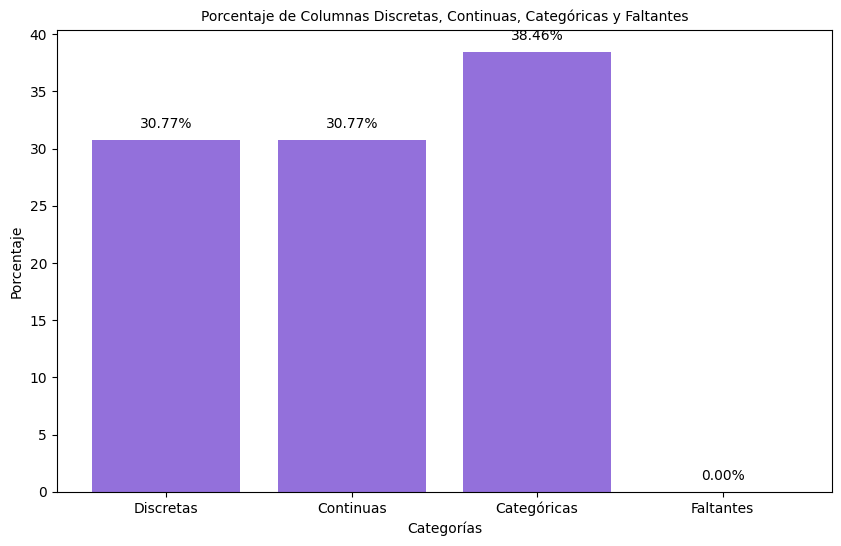

In [9]:
# Obtener los tipos de datos de cada columna en el DataFrame
column_types = car_data.dtypes
len(column_types)  # Número de variables o categorias (columnas)

# Calcular porcentajes
percentage_discrete = (discrete_count / len(column_types)) * 100
percentage_continuous = (continuous_count / len(column_types)) * 100
percentage_categorical = (categorical_count / len(column_types)) * 100
percentage_all_missing = (all_missing_columns / len(column_types)) * 100

# Crear un gráfico de barras
categories = ['Discretas', 'Continuas','Categóricas', 'Faltantes']
percentages = [percentage_discrete, percentage_continuous, percentage_categorical, percentage_all_missing]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=['#9370DB'])
plt.title('Porcentaje de Columnas Discretas, Continuas, Categóricas y Faltantes', fontsize=10)
plt.xlabel('Categorías', fontsize=10)
plt.ylabel('Porcentaje', fontsize=10)

# Agregar etiquetas con los porcentajes
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center', fontsize=10)

plt.show()

#### Normalización Nombres de las Columnas

In [10]:
print(f"* Nombres originales de las columnas:\n  {car_data.columns}\n")
print("- " * 40)
def convert_to_snake_case(column_name):
    return inflection.underscore(column_name)

car_data.columns = [convert_to_snake_case(col) for col in car_data.columns]

#Creamos el diccionario con los titulos de las columnas que vamos a cambiar
diccionario_columnas = {
    'fueltype': 'fuel_type','doornumber': 'door_number', 'carbody': 'car_body', 'drivewheel': 'drive_wheel',
    'enginelocation': 'engine_location','wheelbase': 'wheel_base','carlength': 'car_length','car_width': '',
    'carheight': 'car_height','curbweight': 'curb_weight','enginetype': 'engine_type','cylindernumber': 'cylinder_number',
    'enginesize': 'engine_size','fuelsystem': 'fuel_system','boreratio': 'bore_ratio','compressionratio': 'compression_ratio',
    'horsepower': 'horse_power','peakrpm': 'peak_rpm','citympg': 'city_mpg','highwaympg': 'highway_mpg','carwidth':"car_width"
}

#Cambiamos los nombres de las columnas
for columna in car_data.columns:
    if columna in diccionario_columnas:
        nuevo_nombre = diccionario_columnas[columna]
        car_data.rename(columns={columna: nuevo_nombre}, inplace=True)

#Verificamos que los nombres se hallan cambiado 
print(f"* Nuevos nombres de las columnas:\n  {car_data.columns}")

* Nombres originales de las columnas:
  Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* Nuevos nombres de las columnas:
  Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'engine_location',
       'wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
       'engine_type', 'cylinder_number', 'engine_size', 'fuel_system',
       'bore_ratio', 'stroke', 'compression_ratio', 'horse_power', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')


#### Normalización en las Filas

* Los histogramas muestran la distribución de las columnas numéricas del dataset.


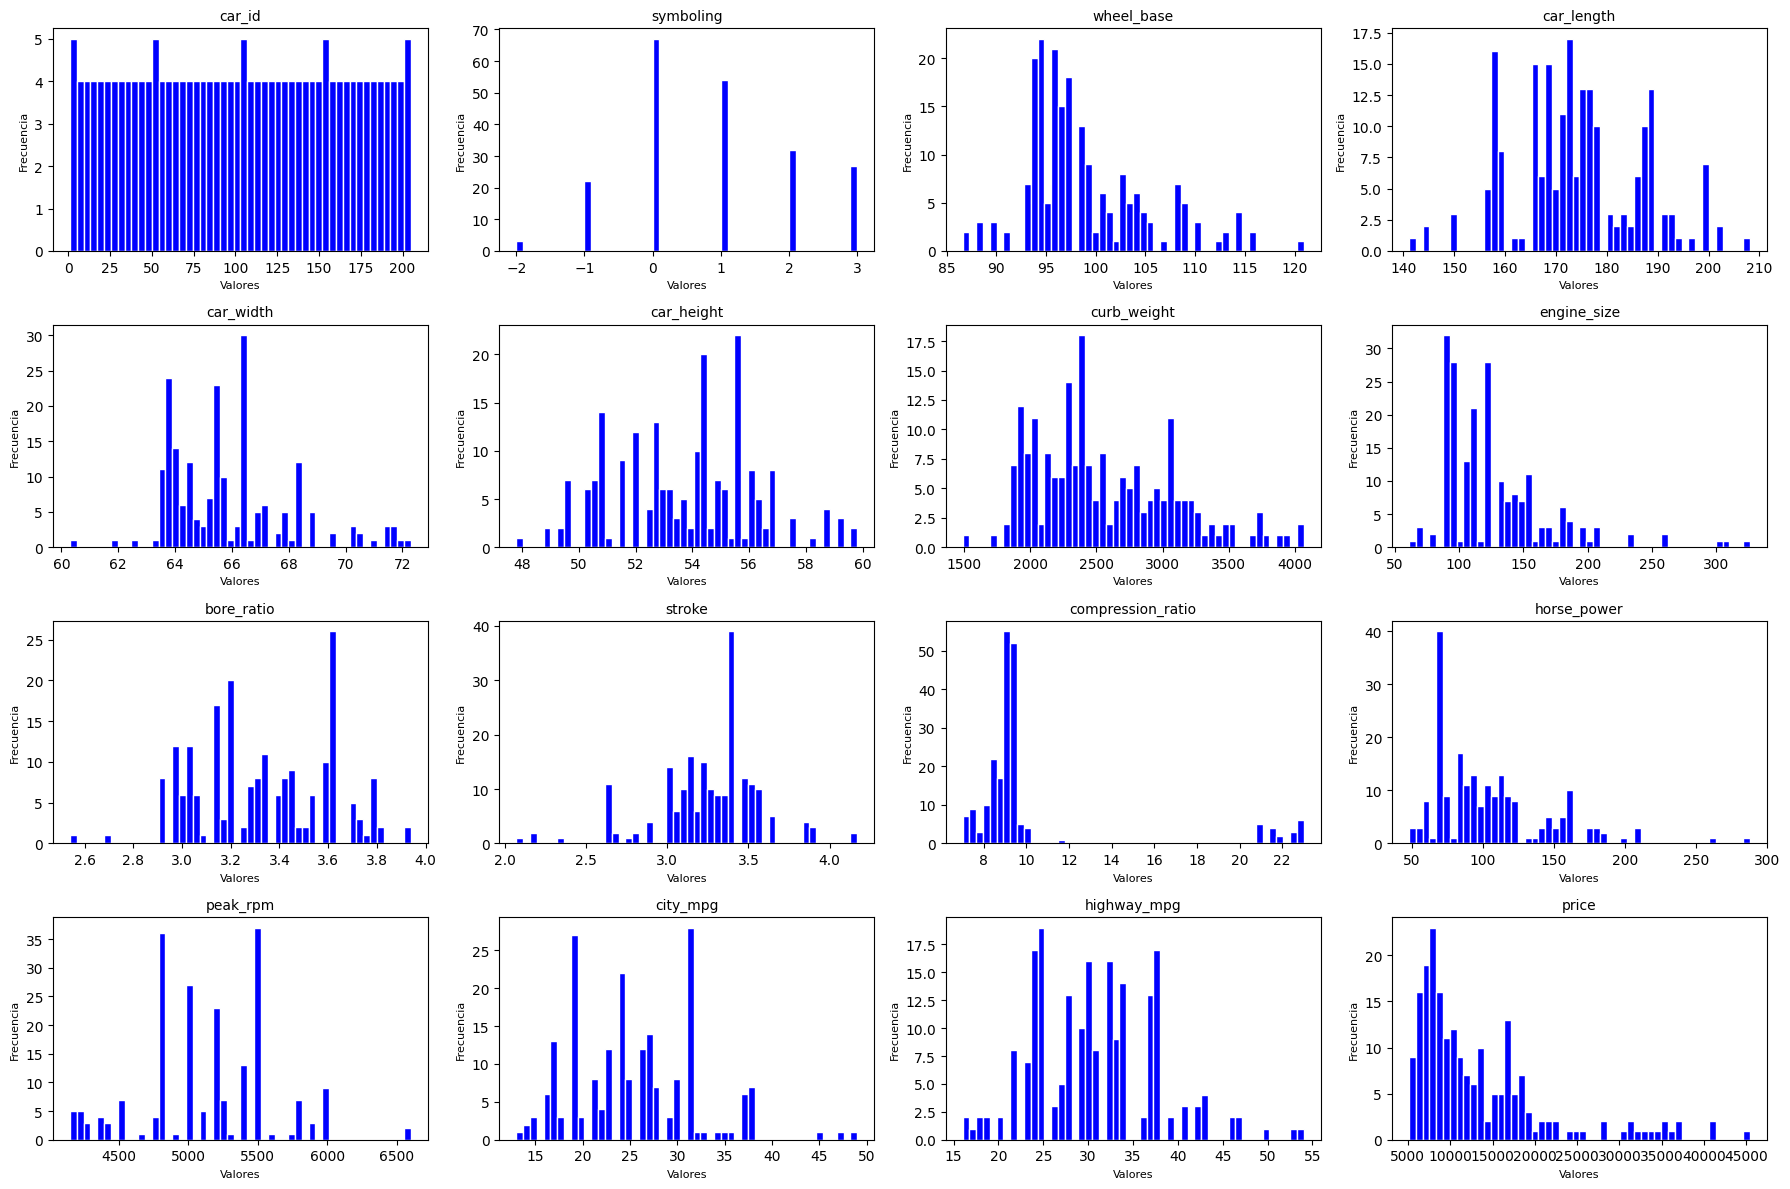

In [11]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = car_data.select_dtypes(include='number')  
num_columns = len(numeric_columns.columns)  # Obtener el número de columnas numéricas

# Calcular el número de filas y columnas para los subplots
num_rows = (num_columns // 4) + (1 if num_columns % 4 != 0 else 0)
num_cols = 4

# Crear subplots para cada columna numérica
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))  # Aumentamos el tamaño de la figura

# Aplanar la matriz de subplots
axes = axes.flatten()

# Iterar sobre las columnas numéricas y crear histogramas
for i, col in enumerate(numeric_columns.columns):
    axes[i].hist(car_data[col], bins=50, color='blue', edgecolor='white')
    axes[i].set_title(col, fontsize=10)  # Título de cada subplot
    axes[i].set_xlabel('Valores', fontsize=8)  # Etiqueta del eje X
    axes[i].set_ylabel('Frecuencia', fontsize=8)  # Etiqueta del eje Y

# Ocultar los subplots vacíos
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

# Ajustar el diseño de los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el histograma
print("* Los histogramas muestran la distribución de las columnas numéricas del dataset.")
plt.show()

* Los histogramas muestran la distribución de las columnas numéricas del dataset.


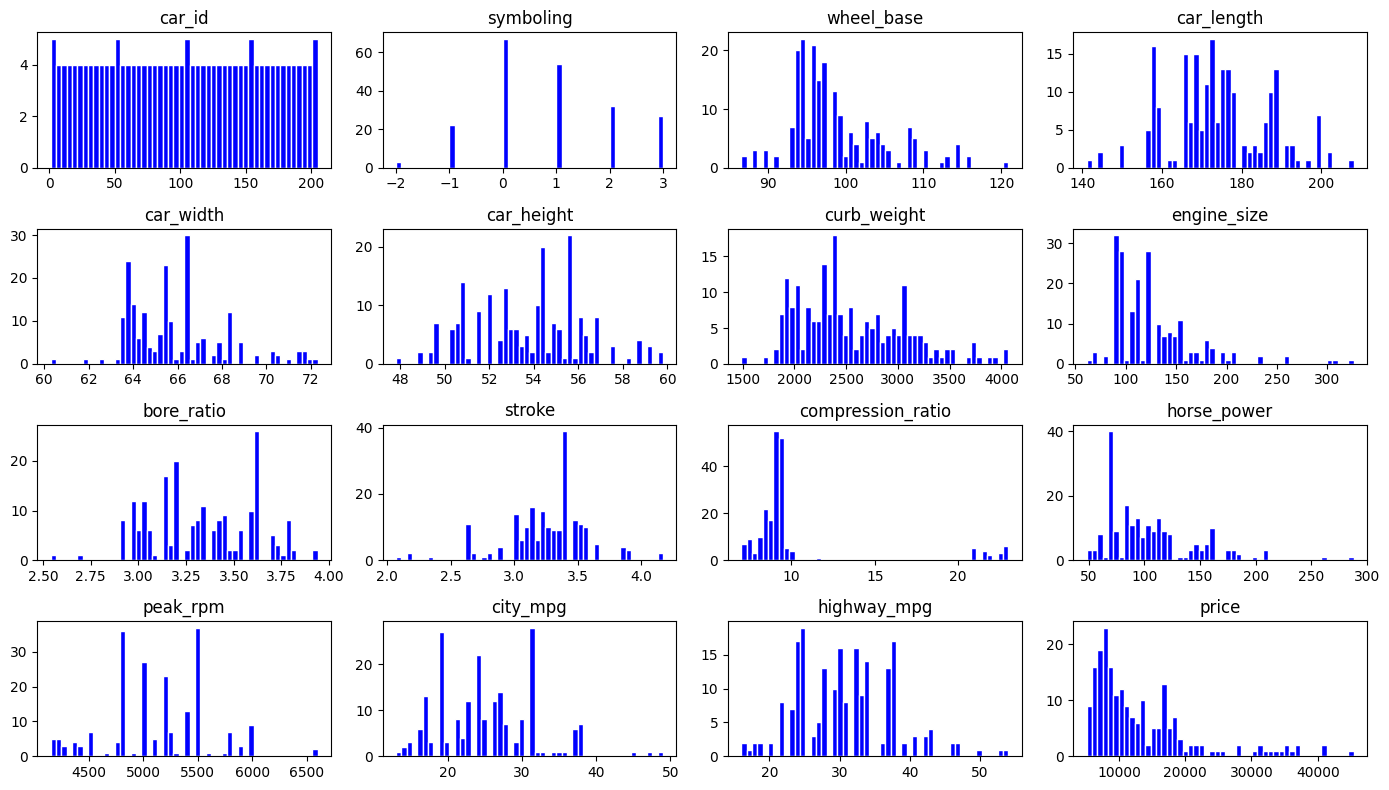

In [12]:
# Buscamos los valores atipicos (outliers) de manera visual  mediante histogramas

numeric_columns = car_data.select_dtypes(include='number')  # Seleccionar solo las columnas numéricas del DataFrame
num_columns = len(numeric_columns.columns)  # Obtener el número de columnas numéricas

# Calcular el número de filas y columnas para los subplots
num_rows = (num_columns // 4) + (num_columns % 4)
num_cols = 4

# Crear subplots para cada columna numérica
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))

# Aplanar la matriz de subplots si es necesario
axes = axes.flatten()

# Iterar sobre las columnas numéricas y crear histogramas
for i, col in enumerate(numeric_columns.columns):
    axes[i].hist(car_data[col], bins=50, color='blue', edgecolor='white')
    axes[i].set_title(col)

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar el histograma
print("* Los histogramas muestran la distribución de las columnas numéricas del dataset.")
plt.show()

#### Preparando los datos para análisis o visualización

In [13]:
#Separamos la columna car_id en dos columnas (marca y modelo)
car_data['car_name'] = car_data['car_name'].str.lower()

# Corrección del split: usando n=1 como argumento de palabra clave
car_data[['marca', 'modelo']] = car_data['car_name'].str.split(' ', n=1, expand=True)
car_data = car_data[['car_id', 'car_name', 'marca', 'modelo'] + [col for col in car_data.columns if col not in ['car_id', 'car_name', 'marca', 'modelo']]]

# Reorganizamos las columnas para que 'car_id', 'car_name', 'marca', y 'modelo' sean las primeras
styled_cars = car_data.style.set_properties(**{'text-align': 'left'}, subset=['marca', 'modelo'])
styled_cars

# Estilo para alinear el contenido de las columnas 'marca' y 'modelo' a la izquierda
car_data = car_data.drop('car_name', axis=1)
print("* Los valores únicos de la columna marca son:")
print("- " * 37)
print(car_data.marca.unique())

* Los valores únicos de la columna marca son:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


#### Corrección en nombres de marcas

In [14]:
marca_correccion = {'alfa-romero': 'alfa romeo', 
                    'maxda': 'mazda',
                    'Nissan': 'nissan',
                    'porcshce': 'porsche',
                    'toyouta': 'toyota', 
                    'vokswagen': 'volkswagen',
                    'vw': 'volkswagen'}
car_data['marca'] = car_data['marca'].replace(marca_correccion)

In [15]:
sorted_cars = car_data.sort_values(by=['marca', 'modelo'], ascending=[True, True])
print("* Combinaciones únicas de marca y modelo:")
print("- " * 37)
print((car_data['marca'] + ' | ' + car_data['modelo'].astype(str)).unique(), end='\n\n')

* Combinaciones únicas de marca y modelo:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['alfa romeo | giulia' 'alfa romeo | stelvio' 'alfa romeo | quadrifoglio'
 'audi | 100 ls' 'audi | 100ls' 'audi | fox' 'audi | 5000' 'audi | 4000'
 'audi | 5000s (diesel)' 'bmw | 320i' 'bmw | x1' 'bmw | x3' 'bmw | z4'
 'bmw | x4' 'bmw | x5' 'chevrolet | impala' 'chevrolet | monte carlo'
 'chevrolet | vega 2300' 'dodge | rampage' 'dodge | challenger se'
 'dodge | d200' 'dodge | monaco (sw)' 'dodge | colt hardtop'
 'dodge | colt (sw)' 'dodge | coronet custom' 'dodge | dart custom'
 'dodge | coronet custom (sw)' 'honda | civic' 'honda | civic cvcc'
 'honda | accord cvcc' 'honda | accord lx' 'honda | civic 1500 gl'
 'honda | accord' 'honda | civic 1300' 'honda | prelude'
 'honda | civic (auto)' 'isuzu | mu-x' 'isuzu | d-max '
 'isuzu | d-max v-cross' 'jaguar | xj' 'jaguar | xf' 'jaguar | xk'
 'mazda | rx3' 'mazda | glc deluxe' 'mazda | rx2 coupe' 'mazda | rx-4'
 'mazda | 626

#### Limpieza de la columna modelo

In [16]:
def limpiar_modelo(input_string, modelo):
    # Patrón regex que coincide con la marca seguida de cualquier cosa
    patron = re.compile(rf'{modelo}.*', flags=re.IGNORECASE)
    
    # Reemplazar todas las ocurrencias que coinciden con el patrón por la marca
    return re.sub(patron, modelo, input_string)

In [17]:
modelos_a_limpiar = ['accord', 'civic', '100', 'corolla', 'corona', '99', 'celica', 'century', 
                     'rabbit', 'mirage', 'glc', 'fury','d-max','coronet','colt']

for modelo in modelos_a_limpiar:
    car_data['modelo'] = car_data['modelo'].astype(str).apply(limpiar_modelo, modelo=modelo)

#### Corrección de los nombres de modelos

In [18]:
modelo_correccion = {'100': 'a6', 
                     'fox': '80',
                     'corona': 'cressida',
                     'mark ii': 'cressida'}
car_data['modelo'] = car_data['modelo'].replace(modelo_correccion)

#### Pasos importantes para procesar y clasificar los precios de los autos del DataFrame. 

In [19]:
# Redondear la columna 'price' y convertir a enteros
car_data['price'] = car_data['price'].round().astype(int)

# Calcula la mediana de la columna "price"
mediana_precio = car_data['price'].median()

# Crea la columna "clasificacion_precio" utilizando una condición
car_data['clasificacion_precio'] = (car_data['price'] <= mediana_precio).astype(int)
print("* DataFrame con dos columnas:")
print("- " *20)
print(car_data[['price', 'clasificacion_precio']]) #1 si el valor se encuentra debajo de la mediana y 0 si se encuentra sobre la mediana

* DataFrame con dos columnas:
- - - - - - - - - - - - - - - - - - - - 
     price  clasificacion_precio
0    13495                     0
1    16500                     0
2    16500                     0
3    13950                     0
4    17450                     0
..     ...                   ...
200  16845                     0
201  19045                     0
202  21485                     0
203  22470                     0
204  22625                     0

[205 rows x 2 columns]


In [20]:
# Diccionario de mapeo de valores
mapeo = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 20}

In [21]:
# columna "door_number": número de puertas
print("* Columna: door_number (número de puertas)")
print("- " * 20)
print(f"* Valores Originales: {car_data['door_number'].unique()}")
print("- " * 20)

car_data['door_number'] = car_data['door_number'].map(mapeo)  # Mapea los valores de texto a números

print("* Valores Convertidos a Números:")
print("- " * 20)
print(car_data['door_number'])

* Columna: door_number (número de puertas)
- - - - - - - - - - - - - - - - - - - - 
* Valores Originales: ['two' 'four']
- - - - - - - - - - - - - - - - - - - - 
* Valores Convertidos a Números:
- - - - - - - - - - - - - - - - - - - - 
0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: door_number, Length: 205, dtype: int64


In [22]:
#columna "cylinder_number":número de cilindros del motor
print("* Columna: cylinder_number")
print("- " * 40)
print(f"* Valores Originales: {car_data['cylinder_number'].unique()}")
print("- " * 40)
car_data['cylinder_number'] = car_data['cylinder_number'].map(mapeo)  # Mapea los valores de texto a números
car_data['cylinder_number'] = car_data['cylinder_number'].fillna(0) # Mapea los valores de texto a números
car_data['cylinder_number'] = car_data['cylinder_number'].astype(int)  # Asegúrate de que los valores sean enteros

print("* Valores Convertidos a Números:")
print(car_data['cylinder_number'])

* Columna: cylinder_number
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Originales: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Convertidos a Números:
0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylinder_number, Length: 205, dtype: int32


#### Columna "symboling" ahora de "calificación de riesgo"

In [23]:
print("* Columna: symboling")
print("- " * 25)
print(f"* Valores Originales: {car_data['symboling'].unique()}")

# Diccionario de mapeo de calificaciones de riesgo
mapeo_calificaciones = {-3: 'Muy Seguro', -2: 'Seguro', -1: 'Poco Seguro', 0: 'Neutral', 1: 'Riesgoso', 2: 'Muy Riesgoso', 3: 'Extremadamente Riesgoso'}

# Mapea las etiquetas a la nueva columna 'calificacion_riesgo'
car_data['calificacion_riesgo'] = car_data['symboling'].map(mapeo_calificaciones)

# Elimina la columna 'symboling'
car_data = car_data.drop('symboling', axis=1)
print("- " * 25)
print("* Valores Convertidos:")
print("- " * 25)
print(car_data['calificacion_riesgo'])

* Columna: symboling
- - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Originales: [ 3  1  2  0 -1 -2]
- - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Convertidos:
- - - - - - - - - - - - - - - - - - - - - - - - - 
0      Extremadamente Riesgoso
1      Extremadamente Riesgoso
2                     Riesgoso
3                 Muy Riesgoso
4                 Muy Riesgoso
                ...           
200                Poco Seguro
201                Poco Seguro
202                Poco Seguro
203                Poco Seguro
204                Poco Seguro
Name: calificacion_riesgo, Length: 205, dtype: object


In [24]:
# Tamaño total en memoria
total_memory_size = car_data.memory_usage().sum() / 1024  # Convertir a KiB
print(f"Tamaño total en memoria: {total_memory_size:.2f} KiB")

Tamaño total en memoria: 42.57 KiB


In [25]:
# Tamaño promedio de registro en memoria
num_observations = car_data.shape[0]
average_record_size = total_memory_size / num_observations
print(f"Tamaño promedio de registro en memoria: {average_record_size:.2f} B")

Tamaño promedio de registro en memoria: 0.21 B


### Conjunto de Datos Limpios

El archivo 'cleaned_dataset.csv' representa el conjunto de datos después de aplicar técnicas de limpieza y preprocesamiento. Hemos guardado este archivo en GitHub para garantizar un acceso fácil y promover la colaboración eficiente.

In [26]:
# Guarda el archivo en local 
car_data.to_csv('cleaned_dataset.csv', index=False)

### Conclusiones del Proceso de Limpieza de Datos

Luego de revisar el conjunto de datos, compuesto por 26 variables y 205 observaciones, se confirmó que no hay filas duplicadas ni valores nulos, lo que proporciona una base sólida para el análisis posterior.

En el proceso de normalización, la columna 'price' fue redondeada y convertida a enteros para mejorar la claridad de su representación. Además, los nombres de los automóviles en la columna 'car_name' fueron transformados a formato snake_case para garantizar coherencia en la nomenclatura.

Se realizaron transformaciones en las columnas 'door_number', 'cylinder_number' y 'symboling' para optimizar su interpretación. En particular, 'symboling' fue mapeada a una nueva variable, 'calificacion_riesgo', que clasifica los vehículos en categorías de riesgo (Extremadamente Riesgoso, Riesgoso, Muy Riesgoso, Neutral, Poco Seguro, Seguro). También se creó la variable 'clasificacion_precio', que clasifica los vehículos como baratos (valor por debajo de la mediana) o caros (valor por encima de la mediana), utilizando la mediana de 'price'.

La detección y tratamiento de outliers se realizó visualmente mediante histogramas, lo que permitió obtener una visión detallada de la distribución de algunas variables. Aunque se identificaron outliers en columnas como 'price', se optó por mantenerlos, ya que representan datos reales del negocio.

Dado el tamaño del conjunto de datos (205 observaciones), se decidió no eliminar los outliers ni columnas, preservando la totalidad de la información para el análisis de machine learning. El conjunto de datos resultante, que ahora contiene 28 variables, fue exportado como 'cleaned_dataset', listo para el análisis y modelado posteriores.

En resumen, este proceso de limpieza de datos asegura la calidad e integridad necesarias para realizar análisis y modelado con confianza en las siguientes fases del proyecto.